In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras

import sys
import os
import sklearn

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

데이터 전처리 참고
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [2]:
train_df = pd.read_csv("train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#비어 있는 데이터의 개수, %

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['total','%'])
missing_data

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
# condition문을 이렇게 작성할 수 있음! 데이터프레임 반환

women = train_df[train_df['Sex'] == 'female']
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

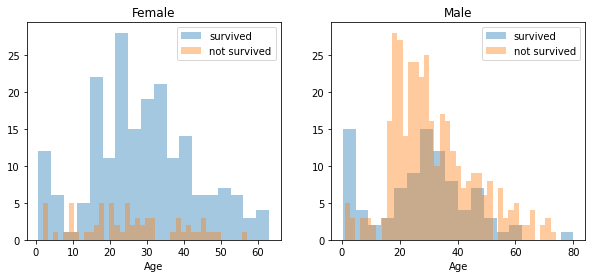

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# 여자 & 생존 / 여자 & 사망인원수를 체크하기 위해 2중 condition문으로 작성

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


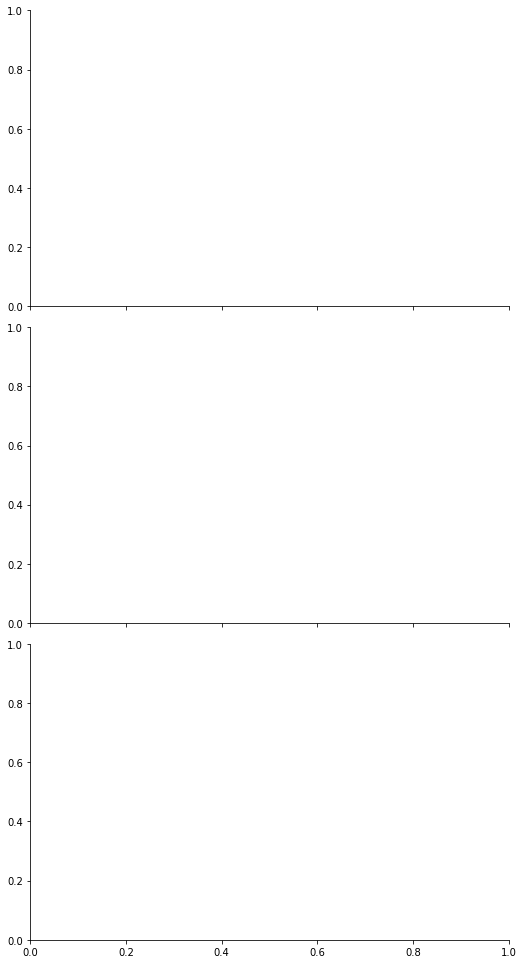

In [8]:
#embarked 기준으로 FacetGrid만 만들면 이렇게 됨

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.add_legend()
FacetGrid

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


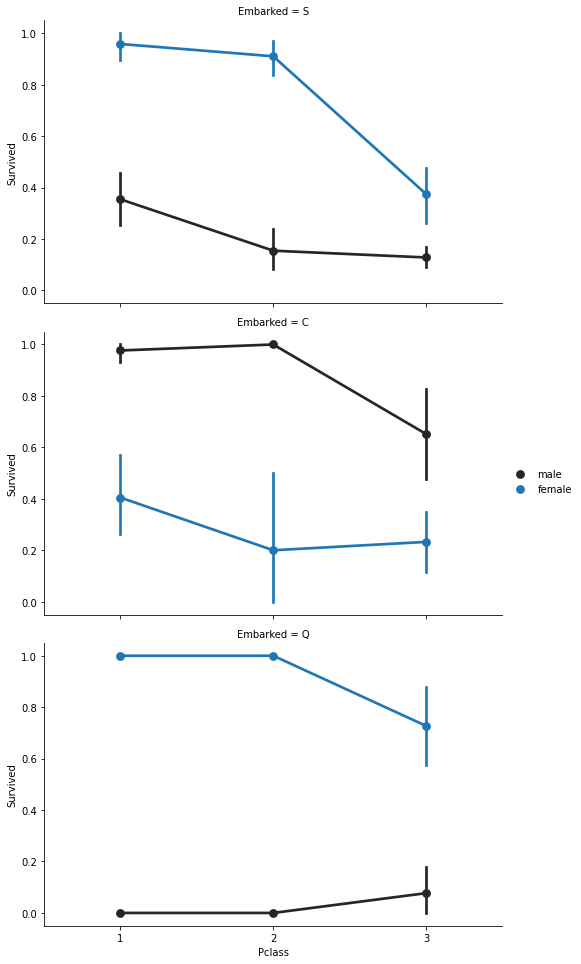

In [9]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

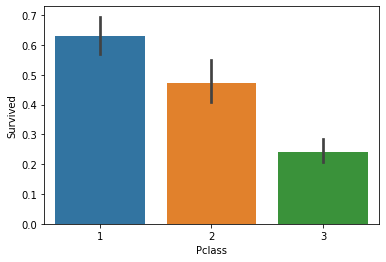

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


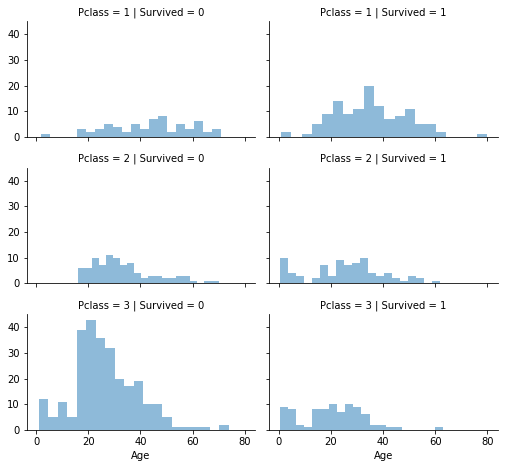

In [11]:
# 두 가지 기준으로 FacetGrid 만들수도 있음!

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [12]:
test_df = pd.read_csv("test.csv")

In [13]:
data = [train_df, test_df]
data

[     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0              1         0       3  ...   7.2500   NaN         S
 1              2         1       1  ...  71.2833   C85         C
 2              3         1       3  ...   7.9250   NaN         S
 3              4         1       1  ...  53.1000  C123         S
 4              5         0       3  ...   8.0500   NaN         S
 ..           ...       ...     ...  ...      ...   ...       ...
 886          887         0       2  ...  13.0000   NaN         S
 887          888         1       1  ...  30.0000   B42         S
 888          889         0       3  ...  23.4500   NaN         S
 889          890         1       1  ...  30.0000  C148         C
 890          891         0       3  ...   7.7500   NaN         Q
 
 [891 rows x 12 columns],      PassengerId  Pclass  ... Cabin Embarked
 0            892       3  ...   NaN        Q
 1            893       3  ...   NaN        S
 2            894       2  ...   NaN       

In [14]:
#데이터프레임에 새로운 열 추가하기 -> df['추가할 열 이름'] = 데이터(배열, 이미 있는 열 등등)

train_df['relatives'] = train_df['SibSp'] + train_df['Parch']
train_df.drop(['relatives'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# for dataset in data:
# data라는 리스트에 있는 1번째 데이터프레임, 2번째 데이터프레임에 각각 아래 구문을 실행!
# for i in list와 같음

for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


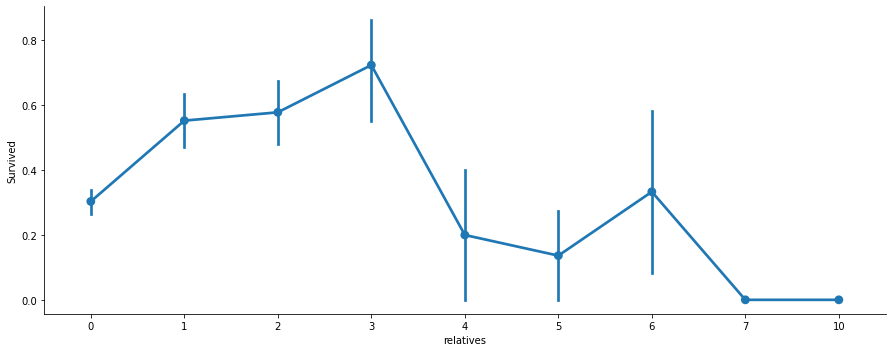

In [16]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

In [17]:
train_df = train_df.drop(['PassengerId'], axis = 1)

In [18]:
#??

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [19]:
random_list = np.random.randint(1, 100, size = 10)
random_list

array([35, 83, 68, 80, 38, 94, 71, 78, 14, 19])

In [20]:
Pclass_slice = train_df['Pclass'].copy()
Pclass_slice

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [21]:
#데이터프레임에서 열 한 개의 값을 리스트의 값으로 바꾸고 싶을 때!
#slice[] 대괄호 내부에는 인덱스 값 넣어야 함!

Pclass_slice[0:10] = random_list
Pclass_slice

0      35
1      83
2      68
3      80
4      38
       ..
886     2
887     1
888     3
889     1
890     3
Name: Pclass, Length: 891, dtype: int64

In [22]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        714 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [25]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    # 데이터프레임 열에 .map(dict형) 사용해서 텍스트 -> 숫자로 변환하기!
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [27]:
genders = {'male':0, 'female':1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [28]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [29]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [30]:
embark = {'S':0, 'C':1, 'Q':2}
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(embark)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22.0,1,0,7,0,1,0,8,1
1,1,1,1,38.0,1,0,71,1,1,0,3,3
2,1,3,1,26.0,0,0,7,0,0,1,8,2
3,1,1,1,35.0,1,0,53,0,1,0,3,3
4,0,3,0,35.0,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,0,0,1,8,5
887,1,1,1,19.0,0,0,30,0,0,1,2,2
888,0,3,1,NaN,1,2,23,0,3,0,8,2
889,1,1,0,26.0,0,0,30,1,0,1,3,1


In [31]:
#Age변수 비어있는 칸 채우기!
#이 블럭에서는 Age제외한 데이터프레임 만듦

from sklearn.neighbors import KNeighborsRegressor
# train
impute_train = train_df[train_df.Age.isnull()].drop(['Age'], axis=1)
impute_train.describe()
# test
impute_test = test_df[test_df.Age.isnull()].drop(['Age'], axis=1)
impute_test.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1102.186047,2.732558,0.290698,0.313953,0.372093,14.511628,0.790698,0.686047,0.779070,7.848837,1.546512
std,113.626997,0.640302,0.456748,0.973310,1.471666,14.171010,0.855656,1.953950,0.417307,0.711543,0.876584
min,902.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,1004.250000,3.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,8.000000,1.000000
50%,1105.500000,3.000000,0.000000,0.000000,0.000000,7.500000,1.000000,0.000000,1.000000,8.000000,1.000000
75%,1181.750000,3.000000,1.000000,0.000000,0.000000,15.000000,2.000000,0.000000,1.000000,8.000000,2.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,69.000000,2.000000,10.000000,1.000000,8.000000,4.000000


In [32]:
#Age를 제외한 나머지 특징들을 이용해서 KNN-Regressor으로 나이를 예측함

# train
knr = KNeighborsRegressor()
titanic_knn_train = train_df[train_df.Age.notnull()]
X_train = titanic_knn_train.drop(['Age'], axis = 1)
y_train = titanic_knn_train.Age
knr.fit(X_train, y_train)
imputed_train_ages = knr.predict(impute_train)
imputed_train_ages
# test
knr = KNeighborsRegressor()
titanic_knn_test = test_df[test_df.Age.notnull()]
X_test = titanic_knn_test.drop(['Age'], axis = 1)
y_test = titanic_knn_test.Age
X_test.isnull().sum()
knr.fit(X_test, y_test)
imputed_test_ages = knr.predict(impute_test)
imputed_test_ages

array([22.   , 40.4  , 39.6  , 39.6  , 28.9  , 28.4  , 34.4  , 31.6  ,
       31.   , 27.2  , 33.3  , 25.6  , 21.   , 24.2  , 20.6  , 23.2  ,
       24.2  , 25.   , 23.2  , 20.   , 20.   , 23.   , 19.7  , 20.9  ,
       29.6  , 30.6  , 33.8  , 29.9  , 29.2  , 34.6  , 33.1  , 28.   ,
       27.2  , 29.2  , 27.8  , 28.6  , 37.6  , 38.   , 22.2  , 19.866,
       25.466, 26.666, 29.4  , 23.8  , 23.4  , 29.9  , 21.6  , 24.   ,
       20.4  , 30.384, 23.5  , 25.1  , 25.1  , 18.   , 23.4  , 18.   ,
       19.4  , 24.   , 19.55 , 18.15 , 21.95 , 29.4  , 30.2  , 30.2  ,
       18.6  , 31.4  , 38.   , 34.6  , 20.766, 22.6  , 28.4  , 26.4  ,
       34.5  , 24.4  , 28.8  , 28.8  , 30.3  , 30.2  , 22.8  , 29.4  ,
       29.4  , 22.5  , 22.5  , 22.5  , 22.5  , 26.5  ])

In [33]:
imputed_train_ages

array([39.8  , 31.6  , 19.   , 30.5  , 17.6  , 34.2  , 28.784, 17.6  ,
       25.6  , 30.5  , 36.5  , 27.9  , 17.6  , 26.   , 50.4  , 50.2  ,
       14.734, 34.2  , 36.5  , 17.6  , 36.5  , 36.5  , 34.2  , 31.   ,
       22.   , 36.5  , 44.4  , 19.   , 23.2  , 34.2  , 36.5  , 29.8  ,
       34.8  , 52.6  , 15.4  , 29.8  , 27.7  , 36.2  , 26.1  , 44.4  ,
       17.6  , 29.8  , 39.3  , 34.2  , 17.8  , 28.6  , 26.5  , 18.9  ,
       34.2  , 32.6  , 44.4  , 20.9  , 24.1  , 17.6  , 33.4  , 44.7  ,
       50.2  , 37.4  , 17.6  , 24.4  , 30.3  , 36.5  , 28.   , 29.8  ,
       23.2  , 37.6  , 34.2  , 21.6  , 50.4  , 30.5  , 17.6  , 17.6  ,
       27.9  , 19.   , 17.6  , 30.   , 34.2  , 44.4  , 17.8  , 34.2  ,
       42.   , 33.4  , 26.6  , 30.5  , 34.2  , 44.4  , 21.6  , 25.   ,
       21.6  , 36.5  , 42.   , 44.4  , 36.5  , 33.4  , 44.4  , 34.2  ,
       38.8  , 33.4  , 17.8  , 21.6  , 21.4  , 27.7  , 20.9  , 52.2  ,
       36.5  , 35.6  , 30.5  , 30.5  , 28.4  , 30.5  , 20.2  , 25.   ,
      

In [34]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22.0,1,0,7,0,1,0,8,1
1,1,1,1,38.0,1,0,71,1,1,0,3,3
2,1,3,1,26.0,0,0,7,0,0,1,8,2
3,1,1,1,35.0,1,0,53,0,1,0,3,3
4,0,3,0,35.0,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,0,0,1,8,5
887,1,1,1,19.0,0,0,30,0,0,1,2,2
888,0,3,1,NaN,1,2,23,0,3,0,8,2
889,1,1,0,26.0,0,0,30,1,0,1,3,1


In [35]:
#Age중에서 nan인 인덱스에만 우리가 예측한 나이 값 리스트를 대입함!

age_slice = train_df['Age'].copy()
age_slice[np.isnan(age_slice)] = imputed_train_ages
train_df['Age'] = age_slice
train_df['Age'] = train_df['Age'].astype(int)

age_slice2 = test_df['Age'].copy()
age_slice2[np.isnan(age_slice2)] = imputed_test_ages
test_df['Age'] = age_slice2
test_df['Age'] = test_df['Age'].astype(int)


train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,8,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1,8,5
887,1,1,1,19,0,0,30,0,0,1,2,2
888,0,3,1,20,1,2,23,0,3,0,8,2
889,1,1,0,26,0,0,30,1,0,1,3,1


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


In [37]:
#Categorization

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

6    176
4    170
5    147
3    126
2    110
1     94
0     68
Name: Age, dtype: int64

In [38]:
#pandas qcut함수
#6개의 범위로 연속형 데이터를 나눠줌. 각 범위에 들어가는 데이터의 수는 대강 비슷하게 맞춰줌!

pd.qcut(train_df['Fare'], 6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                    (26.0, 52.0] < (52.0, 512.0]]

In [39]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.00, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.00) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
  
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,5,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,5,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,2,0,0,1,8,5
887,1,1,1,2,0,0,4,0,0,1,2,2
888,0,3,1,2,1,2,3,0,3,0,8,2
889,1,1,0,3,0,0,4,1,0,1,3,1


In [40]:
train_df.groupby(['Fare', 'Survived']).size()

Fare  Survived
0     0           189
      1            52
1     0            60
      1            10
2     0            94
      1            52
3     0            85
      1            80
4     0            76
      1            47
5     0            45
      1           101
dtype: int64

In [41]:
#새로운 feature 만들기!

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [42]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,5,1,1,0,3,3,5,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,4,0,0,1,5,1,6,4
7,0,3,0,0,3,1,3,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,1,1,0,4,1,1,0,8,3,2,2


In [43]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,5,0,0,0,2,0,1,8,1,15,0
1,893,3,1,6,1,0,0,0,1,0,8,3,18,0
2,894,2,0,6,0,0,2,2,0,1,8,1,12,2
3,895,3,0,3,0,0,1,0,0,1,8,1,9,1
4,896,3,1,2,1,1,2,0,2,0,8,3,6,0
5,897,3,0,1,0,0,2,0,0,1,8,1,3,2
6,898,3,1,4,0,0,0,2,0,1,8,2,12,0
7,899,2,0,3,1,1,4,0,2,0,8,1,6,1
8,900,3,1,1,0,0,0,1,0,1,8,3,3,0
9,901,3,0,2,2,0,3,0,2,0,8,1,6,1


In [45]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [46]:
featuredf = train_df.drop(['Survived'], axis = 1)
labeldf = train_df['Survived']

In [47]:
X_train,X_val,Y_train,Y_val = sklearn.model_selection.train_test_split(featuredf,labeldf, test_size = 0.2,random_state = 42)

In [48]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
331,1,0,6,0,4,0,0,3,1,6,4
733,2,0,3,0,2,0,0,8,1,6,2
382,3,0,4,0,0,0,0,8,1,12,0
704,3,0,3,1,0,0,1,8,1,9,0
813,3,1,0,4,4,0,6,8,2,0,0


In [49]:
train_df.shape[1]

12

In [50]:
Densemodel = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(32, input_shape = ((train_df.shape[1] - 1), ), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation = 'softmax')
    
])

In [53]:
#from_logits = True, False 주의하기!

Densemodel.compile(optimizer = 'adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics = ['accuracy'])

In [54]:
Densemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2,626
Trainable params: 2,626
Non-trainable params: 0
_________________________________________________________________


In [55]:
EPOCHS = 2000

model_checkpoint = keras.callbacks.ModelCheckpoint(
"my_checkpoint.h5", save_best_only = True)

early_stopping = keras.callbacks.EarlyStopping(patience = 200)

model = Densemodel.fit(X_train, Y_train, validation_data = (X_val, Y_val),
               epochs = EPOCHS,
               callbacks = [model_checkpoint, early_stopping])

Epoch 1/2000
23/23 [==============================] - 1s 17ms/step - loss: 1.0833 - accuracy: 0.5463 - val_loss: 0.6389 - val_accuracy: 0.5866
Epoch 2/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.8521 - accuracy: 0.5730 - val_loss: 0.5824 - val_accuracy: 0.6480
Epoch 3/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.7543 - accuracy: 0.5997 - val_loss: 0.5490 - val_accuracy: 0.7263
Epoch 4/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.6354 - accuracy: 0.6728 - val_loss: 0.5312 - val_accuracy: 0.7430
Epoch 5/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.6431 - accuracy: 0.6489 - val_loss: 0.5255 - val_accuracy: 0.8268
Epoch 6/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.6307 - accuracy: 0.6587 - val_loss: 0.5137 - val_accuracy: 0.7486
Epoch 7/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.5974 - accuracy: 0.6770 - val_loss: 0.5096 - val_accuracy: 0.8268
Epoch

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


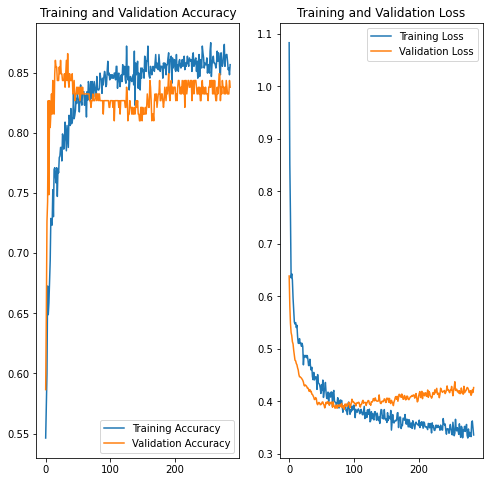

In [56]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

loss = model.history['loss']
val_loss = model.history['val_loss']

#실 훈련 epoch으로 바꿔주기!
epochs_range = range(286)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,5,0,0,2,0,8,1,15,0
1,893,3,1,6,1,0,0,1,8,3,18,0
2,894,2,0,6,0,2,2,0,8,1,12,2
3,895,3,0,3,0,1,0,0,8,1,9,1
4,896,3,1,2,1,2,0,2,8,3,6,0


In [58]:
test = test_df.drop(['PassengerId'], axis = 1)
test.head(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,5,0,0,2,0,8,1,15,0
1,3,1,6,1,0,0,1,8,3,18,0
2,2,0,6,0,2,2,0,8,1,12,2
3,3,0,3,0,1,0,0,8,1,9,1
4,3,1,2,1,2,0,2,8,3,6,0


In [60]:
prediction = Densemodel.predict(test)

test_label = ['Dead', 'Survived']
test_label[np.argmax(prediction[0])]

'Dead'

In [61]:
testlist = []

for i in range(418):
    print('Passenger No. {} - {} '.format(i+1, test_label[np.argmax(prediction[i])]))
    testlist.append(np.argmax(prediction[i]))

Passenger No. 1 - Dead 
Passenger No. 2 - Dead 
Passenger No. 3 - Dead 
Passenger No. 4 - Dead 
Passenger No. 5 - Survived 
Passenger No. 6 - Dead 
Passenger No. 7 - Dead 
Passenger No. 8 - Dead 
Passenger No. 9 - Survived 
Passenger No. 10 - Dead 
Passenger No. 11 - Dead 
Passenger No. 12 - Dead 
Passenger No. 13 - Survived 
Passenger No. 14 - Dead 
Passenger No. 15 - Survived 
Passenger No. 16 - Survived 
Passenger No. 17 - Dead 
Passenger No. 18 - Dead 
Passenger No. 19 - Dead 
Passenger No. 20 - Dead 
Passenger No. 21 - Dead 
Passenger No. 22 - Survived 
Passenger No. 23 - Survived 
Passenger No. 24 - Dead 
Passenger No. 25 - Survived 
Passenger No. 26 - Dead 
Passenger No. 27 - Survived 
Passenger No. 28 - Dead 
Passenger No. 29 - Dead 
Passenger No. 30 - Dead 
Passenger No. 31 - Dead 
Passenger No. 32 - Dead 
Passenger No. 33 - Dead 
Passenger No. 34 - Dead 
Passenger No. 35 - Dead 
Passenger No. 36 - Dead 
Passenger No. 37 - Dead 
Passenger No. 38 - Dead 
Passenger No. 39 - Dead

In [62]:
output = pd.DataFrame({'PassengerID': test_df['PassengerId'].values.tolist(), 'Survived': testlist})
output.to_csv('submission_Dense3.csv', index = False)

HyperParameter Tuning

In [72]:
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [73]:
def build_model(mi):
  model = tf.keras.Sequential()
  for i in range(mi.Int('num_layers', 2, 20)):
    model.add(layers.Dense(units = mi.Int('units_' + str(i),
                                          min_value = 16,
                                          max_value = 512,
                                          step = 16),
                           activation = 'relu'))
    model.add(layers.Dropout(mi.Choice('dropoutprob_', [0.1, 0.2, 0.3, 0.4, 0.5])))
  model.add(layers.Dense(2, activation = 'softmax'))
  model.compile(
      optimizer = tf.keras.optimizers.Adam(mi.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5, 1e-6])),
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy']
  )
  return model

In [74]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    directory = 'project2',
    project_name = 'Titanic2'
)

In [75]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
dropoutprob_ (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}


In [76]:
tuner.search(X_train, Y_train, epochs = 200, validation_data = (X_val, Y_val))

Trial 5 Complete [00h 03m 28s]
val_accuracy: 0.858472983042399

Best val_accuracy So Far: 0.858472983042399
Total elapsed time: 00h 17m 25s
INFO:tensorflow:Oracle triggered exit


In [77]:
tuner.results_summary()

Results summary
Results in project2/Titanic2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 19
units_0: 432
dropoutprob_: 0.4
units_1: 224
learning_rate: 0.001
units_2: 192
units_3: 288
units_4: 80
units_5: 272
units_6: 272
units_7: 368
units_8: 128
units_9: 416
units_10: 48
units_11: 512
units_12: 352
units_13: 512
units_14: 288
units_15: 432
units_16: 192
units_17: 16
units_18: 16
Score: 0.858472983042399
Trial summary
Hyperparameters:
num_layers: 8
units_0: 336
dropoutprob_: 0.3
units_1: 288
learning_rate: 0.0001
units_2: 16
units_3: 16
units_4: 16
units_5: 16
units_6: 16
units_7: 16
Score: 0.8454376061757406
Trial summary
Hyperparameters:
num_layers: 6
units_0: 112
dropoutprob_: 0.1
units_1: 96
learning_rate: 1e-06
units_2: 304
units_3: 160
units_4: 320
units_5: 224
units_6: 288
units_7: 272
Score: 0.6759776473045349
Trial summary
Hyperparameters:
num_layers: 13
units_0: 112
dropoutprob_: 0.5
units_1: 448
learning_r

가장 정확도가 높은 trial은 19개의 레이어가 있어 너무 많으므로, 그 다음으로 좋은 trial 사용하기!

Trial summary

Hyperparameters:

num_layers: 8

units_0: 336

dropoutprob_: 0.3

units_1: 288

learning_rate: 0.0001

units_2: 16

units_3: 16

units_4: 16

units_5: 16

units_6: 16

units_7: 16

Score: 0.8454376061757406

In [78]:
Tunedmodel = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(336, input_shape = ((train_df.shape[1] - 1), ), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(288, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation = 'softmax')
    
])

In [79]:
Tunedmodel.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics = ['accuracy']
  )

In [80]:
EPOCHS = 2000

model_checkpoint = keras.callbacks.ModelCheckpoint(
"my_checkpoint.h5", save_best_only = True)

early_stopping = keras.callbacks.EarlyStopping(patience = 200)

Tunedhistory = Tunedmodel.fit(X_train, Y_train, validation_data = (X_val, Y_val),
               epochs = EPOCHS,
               callbacks = [model_checkpoint, early_stopping])

Epoch 1/2000
23/23 [==============================] - 1s 21ms/step - loss: 0.7471 - accuracy: 0.5534 - val_loss: 0.6759 - val_accuracy: 0.5866
Epoch 2/2000
23/23 [==============================] - 0s 8ms/step - loss: 0.7019 - accuracy: 0.5435 - val_loss: 0.6809 - val_accuracy: 0.5866
Epoch 3/2000
23/23 [==============================] - 0s 8ms/step - loss: 0.6987 - accuracy: 0.5309 - val_loss: 0.6833 - val_accuracy: 0.5866
Epoch 4/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.5295 - val_loss: 0.6795 - val_accuracy: 0.5866
Epoch 5/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.6835 - accuracy: 0.5604 - val_loss: 0.6777 - val_accuracy: 0.5866
Epoch 6/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.6775 - accuracy: 0.5393 - val_loss: 0.6810 - val_accuracy: 0.5866
Epoch 7/2000
23/23 [==============================] - 0s 8ms/step - loss: 0.6717 - accuracy: 0.5758 - val_loss: 0.6761 - val_accuracy: 0.5866
Epoch

In [81]:
Tunedmodel = keras.models.load_model("my_checkpoint.h5")

In [90]:
test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,5,0,0,2,0,8,1,15,0
1,3,1,6,1,0,0,1,8,3,18,0
2,2,0,6,0,2,2,0,8,1,12,2
3,3,0,3,0,1,0,0,8,1,9,1
4,3,1,2,1,2,0,2,8,3,6,0


In [91]:
prediction = Tunedmodel.predict(test)

test_label = ['Dead', 'Survived']
test_label[np.argmax(prediction[0])]

'Dead'

In [93]:
testlist2 = []

for i in range(418):
    print('Passenger No. {} - {} '.format(i+1, test_label[np.argmax(prediction[i])]))
    testlist2.append(np.argmax(prediction[i]))

Passenger No. 1 - Dead 
Passenger No. 2 - Dead 
Passenger No. 3 - Dead 
Passenger No. 4 - Dead 
Passenger No. 5 - Survived 
Passenger No. 6 - Dead 
Passenger No. 7 - Survived 
Passenger No. 8 - Dead 
Passenger No. 9 - Survived 
Passenger No. 10 - Dead 
Passenger No. 11 - Dead 
Passenger No. 12 - Dead 
Passenger No. 13 - Survived 
Passenger No. 14 - Dead 
Passenger No. 15 - Survived 
Passenger No. 16 - Survived 
Passenger No. 17 - Dead 
Passenger No. 18 - Dead 
Passenger No. 19 - Survived 
Passenger No. 20 - Dead 
Passenger No. 21 - Dead 
Passenger No. 22 - Survived 
Passenger No. 23 - Survived 
Passenger No. 24 - Dead 
Passenger No. 25 - Survived 
Passenger No. 26 - Dead 
Passenger No. 27 - Survived 
Passenger No. 28 - Dead 
Passenger No. 29 - Dead 
Passenger No. 30 - Dead 
Passenger No. 31 - Dead 
Passenger No. 32 - Dead 
Passenger No. 33 - Survived 
Passenger No. 34 - Dead 
Passenger No. 35 - Survived 
Passenger No. 36 - Dead 
Passenger No. 37 - Survived 
Passenger No. 38 - Survived 

In [94]:
testlist2

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,


In [95]:
output = pd.DataFrame({'PassengerID': test_df['PassengerId'].values.tolist(), 'Survived': testlist2})
output.to_csv('submission_TunedDense.csv', index = False)